In [1]:
from libdatasets import *
import librun
import libstop
from importlib import reload
from libadversarial import uncertainty_stop
from libstop import rank_stop_conds
from dotenv import load_dotenv; load_dotenv();

In [2]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        ("rcv1", wrap(rcv1, None)),
    ],
    "dataset_mutators": {
        "none": (lambda *x, **kwargs: x),
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [3]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

Experiment:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
def plot_stop(plots, classifiers, stop_conditions, stop_results, scale='linear', figsize=(26, 4), lines=None):
    from librun import plot
    import matplotlib.pyplot as plt
    reload(libstop)
    from libstop import SSNCut
    figaxes = plot(plots, ret=True, sort=False, extra=1, scale=scale, figsize=figsize)
    for i, (fig, ax) in enumerate(figaxes):
        clfs = classifiers[i]
        config = plots[i][0]
        metrics = plots[i][1]
        prop_cycle = plt.rcParams['axes.prop_cycle']
        colors = prop_cycle.by_key()['color']

        ax[-1].plot(metrics[0].x, SSNCut(config, clfs[0], 0))
        
        fig.legend()
        fig.tight_layout()

C:\Users\Zac\Programming\python\research\libactive.py:728: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mask[rows] = False


[]
before fit_predict
(1000, 47236) float64 90279 (90279,) (90279,) (1001,)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

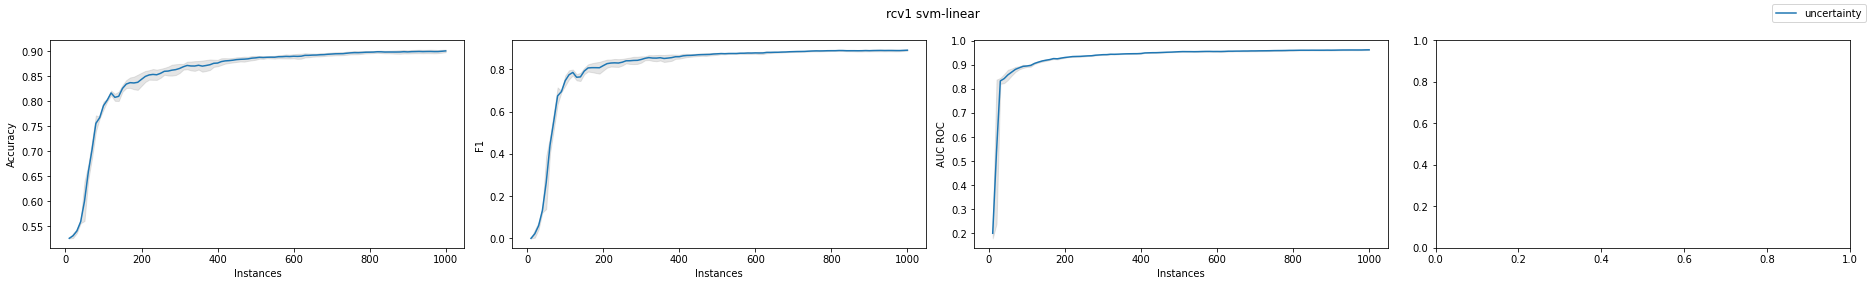

In [17]:
plot_stop(results_plots, classifiers, None, None)

In [8]:
from sklearn.cluster import SpectralClustering

In [12]:
M = np.array([[1,2], [2,2], [1,2]])
M_sparse = scipy.sparse.csr_matrix(M)

In [13]:
SpectralClustering(n_clusters=2, affinity='linear').fit_predict(M_sparse)

array([0, 1, 1])

---

.

.

.

.

.

.

.

.

.


In [6]:
classifiers[0][0][0].X_training.shape

(10, 22)

In [9]:
config = results_plots[0][0]; i = 0
import libdatasets
from sklearn.utils import check_random_state
from libactive import active_split
X, y = getattr(libdatasets, config.dataset_name)(None)
rand = check_random_state(i)
if config.dataset_mutator_name != 'none':
    raise UnimplementedError("WARNING: Dataset mutation is not implemented in reconstruct_unlabelled")
X_labelled, X_unlabelled, Y_labelled, Y_oracle, X_teset, Y_test = active_split(
    X, y, labeled_size=config.meta['labelled_size'], test_size=config.meta['test_size'], random_state=rand, ensure_y=config.meta['ensure_y'])

C:\Users\Zac\Programming\python\research\libactive.py:71: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if klass not in Y_labelled:


In [19]:
#(X_unlabelled[:,None]==classifiers[0][0][0].X_training)

In [53]:
X, y = libdatasets.rcv1(1000)

In [55]:
for row in X[:10]:
    print(row)

  (0, 439)	0.0531595964774674
  (0, 1896)	0.0876691588465831
  (0, 2431)	0.173929102711374
  (0, 5989)	0.184979777257965
  (0, 7654)	0.214128756386382
  (0, 7974)	0.0797001031200897
  (0, 9105)	0.0663065953283877
  (0, 9886)	0.537984942616429
  (0, 13626)	0.0439249880850242
  (0, 13657)	0.0844541860499832
  (0, 15151)	0.0513948551954045
  (0, 16808)	0.0547964091849702
  (0, 17870)	0.25180800793628
  (0, 18398)	0.0670828053470959
  (0, 20115)	0.0578778887257848
  (0, 20987)	0.0977276447756361
  (0, 21248)	0.25180800793628
  (0, 22560)	0.207261687927585
  (0, 24891)	0.0705523260838383
  (0, 25356)	0.09803936208875
  (0, 25417)	0.0884874230531324
  (0, 25719)	0.119969321154352
  (0, 26791)	0.20820040526703
  (0, 26804)	0.0691358844265834
  (0, 28216)	0.103806560871247
  (0, 28752)	0.0359566280079627
  (0, 30124)	0.0578864829911895
  (0, 31026)	0.272228067235253
  (0, 31593)	0.068341054658202
  (0, 32250)	0.279957603452211
  (0, 33169)	0.0549133463611669
  (0, 33329)	0.113309242864161
  (0